**1. Data Preprocessinng**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
!pip install openpyxl

In [10]:
df= pd.read_excel("EastWestAirlines.xlsx")
df

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0


In [11]:
df.describe()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
count,3999.000000,3.999000e+03,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.00000,3999.000000,3999.000000,3999.00000,3999.000000
mean,2014.819455,7.360133e+04,144.114529,2.059515,1.014504,1.012253,17144.846212,11.60190,460.055764,1.373593,4118.55939,0.370343
std,1160.764358,1.007757e+05,773.663804,1.376919,0.147650,0.195241,24150.967826,9.60381,1400.209171,3.793172,2065.13454,0.482957
min,1.000000,0.000000e+00,0.000000,1.000000,1.000000,1.000000,0.000000,0.00000,0.000000,0.000000,2.00000,0.000000
25%,1010.500000,1.852750e+04,0.000000,1.000000,1.000000,1.000000,1250.000000,3.00000,0.000000,0.000000,2330.00000,0.000000
50%,2016.000000,4.309700e+04,0.000000,1.000000,1.000000,1.000000,7171.000000,12.00000,0.000000,0.000000,4096.00000,0.000000
75%,3020.500000,9.240400e+04,0.000000,3.000000,1.000000,1.000000,23800.500000,17.00000,311.000000,1.000000,5790.50000,1.000000
max,4021.000000,1.704838e+06,11148.000000,5.000000,3.000000,5.000000,263685.000000,86.00000,30817.000000,53.000000,8296.00000,1.000000


In [12]:
df.dtypes

ID#                  int64
Balance              int64
Qual_miles           int64
cc1_miles            int64
cc2_miles            int64
cc3_miles            int64
Bonus_miles          int64
Bonus_trans          int64
Flight_miles_12mo    int64
Flight_trans_12      int64
Days_since_enroll    int64
Award?               int64
dtype: object

In [13]:
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
3994    False
3995    False
3996    False
3997    False
3998    False
Length: 3999, dtype: bool

In [14]:
df.duplicated().sum()

np.int64(0)

In [15]:
df.shape

(3999, 12)

In [16]:
df.isnull().sum()

ID#                  0
Balance              0
Qual_miles           0
cc1_miles            0
cc2_miles            0
cc3_miles            0
Bonus_miles          0
Bonus_trans          0
Flight_miles_12mo    0
Flight_trans_12      0
Days_since_enroll    0
Award?               0
dtype: int64

In [17]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)

In [18]:
scaled_df = pd.DataFrame(scaled_data, columns=df.columns)

print("Data after scaling:")
print(scaled_df.head())

Data after scaling:
        ID#   Balance  Qual_miles  cc1_miles  cc2_miles  cc3_miles  \
0 -1.735125 -0.451141   -0.186299  -0.769578  -0.098242  -0.062767   
1 -1.734263 -0.539457   -0.186299  -0.769578  -0.098242  -0.062767   
2 -1.733402 -0.320031   -0.186299  -0.769578  -0.098242  -0.062767   
3 -1.732540 -0.583799   -0.186299  -0.769578  -0.098242  -0.062767   
4 -1.731679  0.239678   -0.186299   1.409471  -0.098242  -0.062767   

   Bonus_miles  Bonus_trans  Flight_miles_12mo  Flight_trans_12  \
0    -0.702786    -1.104065          -0.328603        -0.362168   
1    -0.701088    -0.999926          -0.328603        -0.362168   
2    -0.539253    -0.791649          -0.328603        -0.362168   
3    -0.689286    -1.104065          -0.328603        -0.362168   
4     1.083121     1.499394           1.154932         0.692490   

   Days_since_enroll    Award?  
0           1.395454 -0.766919  
1           1.379957 -0.766919  
2           1.411920 -0.766919  
3           1.372208 -0.

**2. EDA**

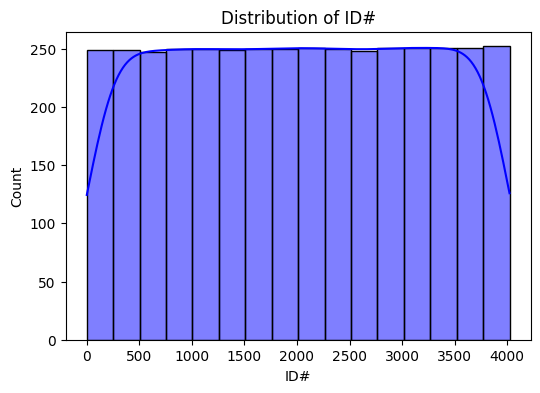

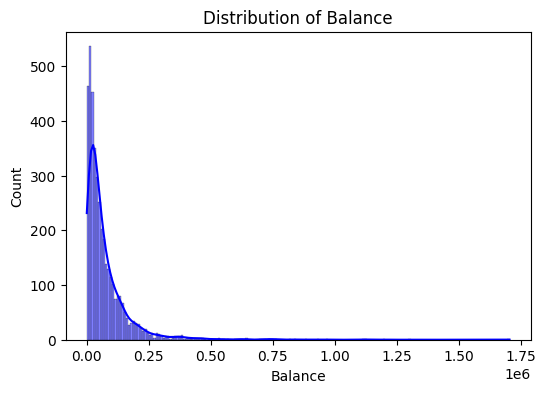

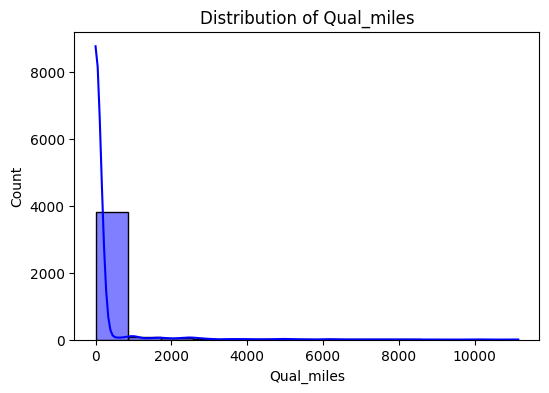

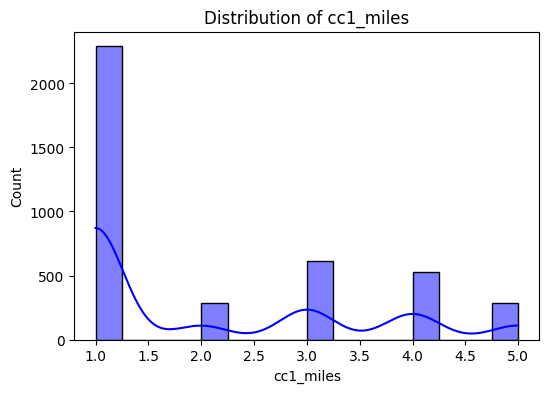

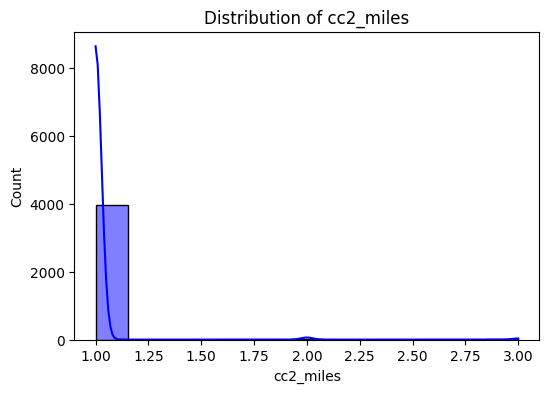

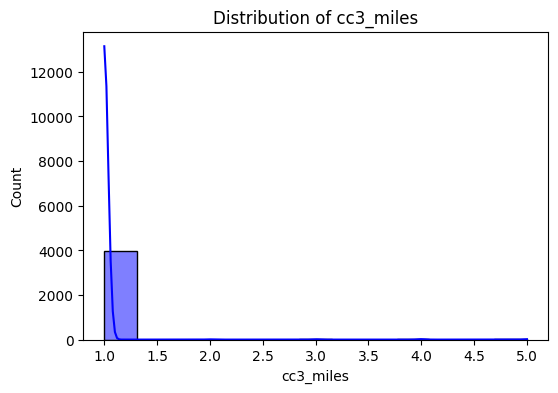

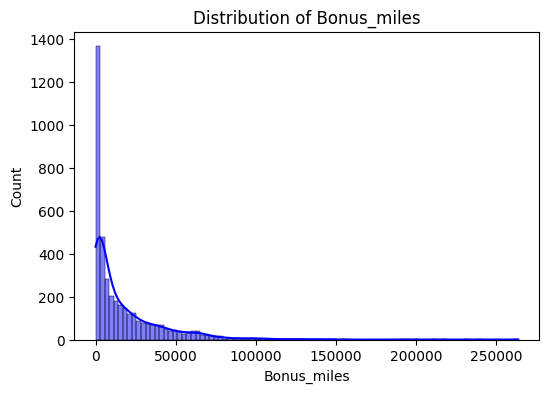

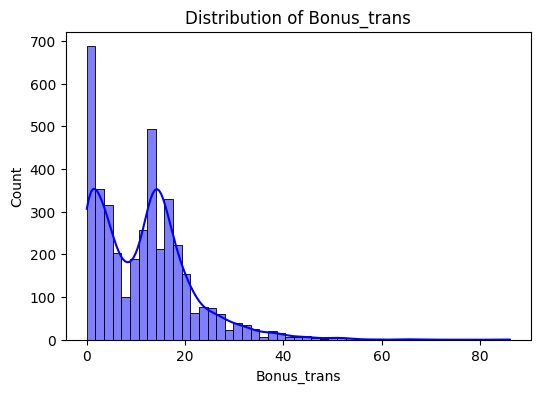

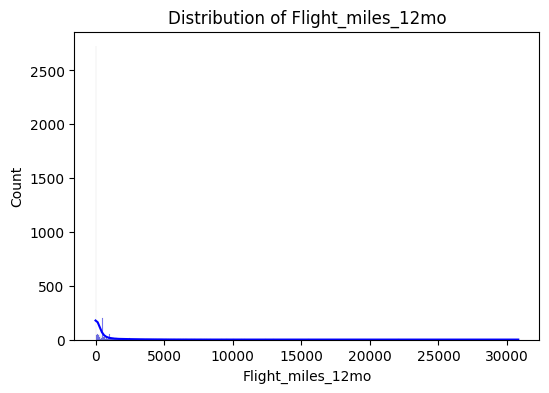

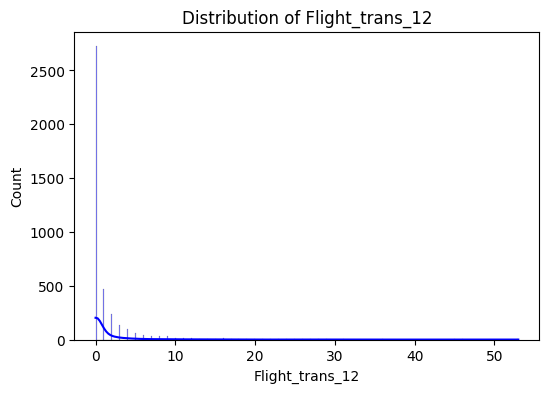

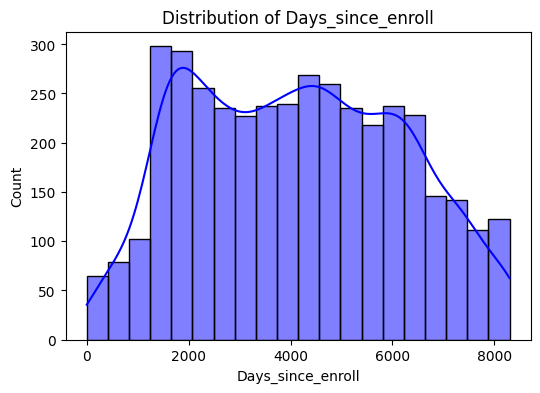

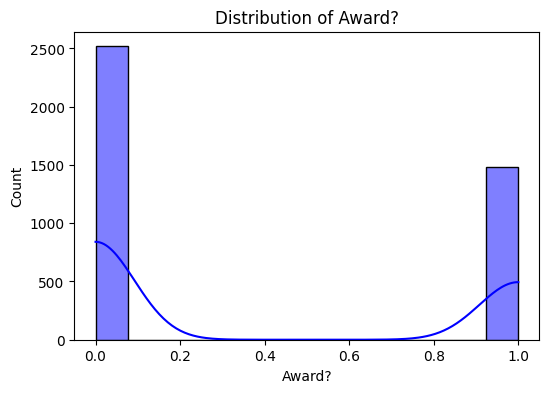

In [19]:
for col in df.columns:
    plt.figure(figsize=(6, 4))
    sns.histplot(df[col], kde=True, color="blue")
    plt.title(f"Distribution of {col}")
    plt.show()

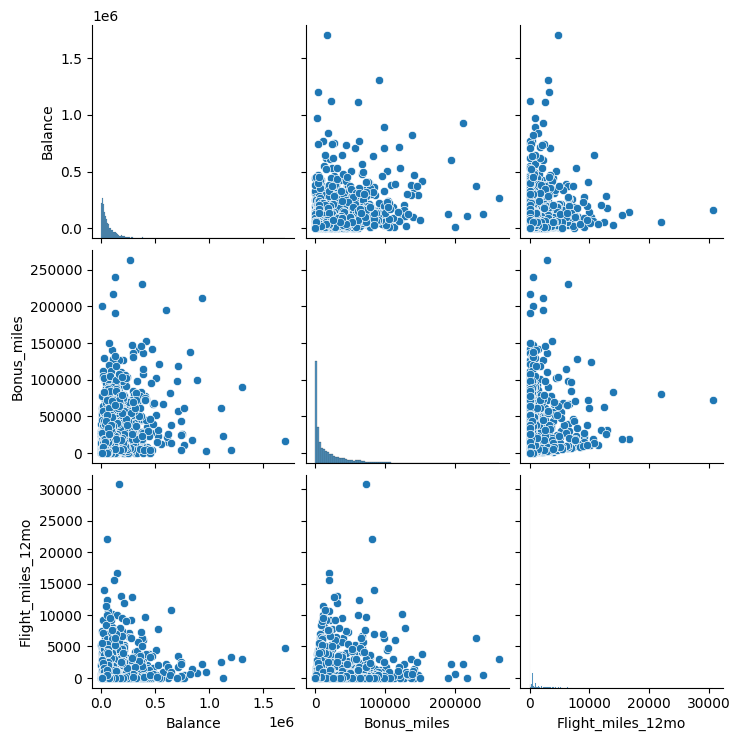

In [20]:
sns.pairplot(df[['Balance', 'Bonus_miles', 'Flight_miles_12mo']])
plt.show()

**3. Implement Cliustering Algorithms**

In [21]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [22]:
inertia = []
for k in range(2, 10):  # Testing for clusters between 2 and 10
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_df)
    inertia.append(kmeans.inertia_)

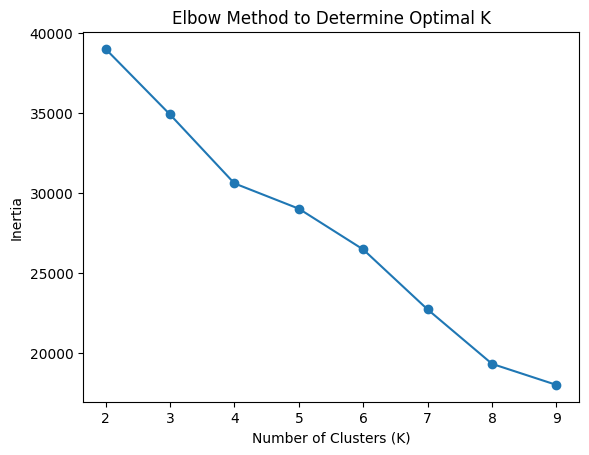

In [23]:
plt.plot(range(2, 10), inertia, marker='o')
plt.title("Elbow Method to Determine Optimal K")
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Inertia")
plt.show()

In [24]:
kmeans = KMeans(n_clusters=4, random_state=42)
df['KMeans_Cluster'] = kmeans.fit_predict(scaled_df)

In [25]:
silhouette = silhouette_score(scaled_df, df['KMeans_Cluster'])
print(f"Silhouette Score for K-Means: {silhouette}")

Silhouette Score for K-Means: 0.22808887010836637


In [26]:
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering

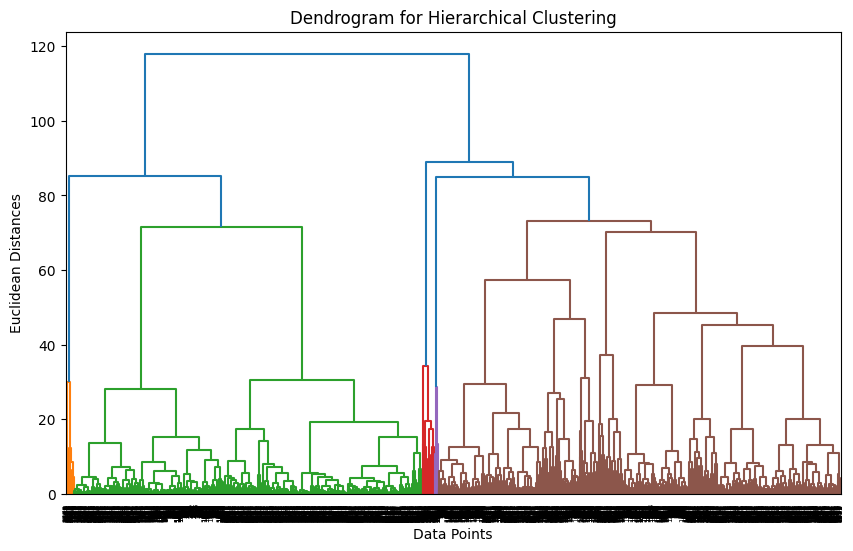

In [27]:
plt.figure(figsize=(10, 6))
dendrogram = sch.dendrogram(sch.linkage(scaled_df, method='ward'))
plt.title("Dendrogram for Hierarchical Clustering")
plt.xlabel("Data Points")
plt.ylabel("Euclidean Distances")
plt.show()

In [28]:
hc = AgglomerativeClustering(n_clusters=4, linkage='ward')
df['HC_Cluster'] = hc.fit_predict(scaled_df)
print("Hierarchical Clustering Results:")
print(df['HC_Cluster'].value_counts())

Hierarchical Clustering Results:
HC_Cluster
0    2093
1    1800
2      63
3      43
Name: count, dtype: int64


In [31]:
from sklearn.cluster import DBSCAN

In [32]:
dbscan = DBSCAN(eps=1.5, min_samples=5)  # Experiment with 'eps' and 'min_samples'
df['DBSCAN_Cluster'] = dbscan.fit_predict(scaled_df)
print("DBSCAN Clustering Results:")
print(df['DBSCAN_Cluster'].value_counts())

DBSCAN Clustering Results:
DBSCAN_Cluster
 0    2404
 1    1216
-1     352
 2      15
 3       8
 4       4
Name: count, dtype: int64


In [33]:
if len(set(df['DBSCAN_Cluster'])) > 1:
    silhouette = silhouette_score(scaled_df, df['DBSCAN_Cluster'])
    print(f"Silhouette Score for DBSCAN: {silhouette}")

Silhouette Score for DBSCAN: 0.1895328629344176


**4. Cluster Analysis and Visuaalization**

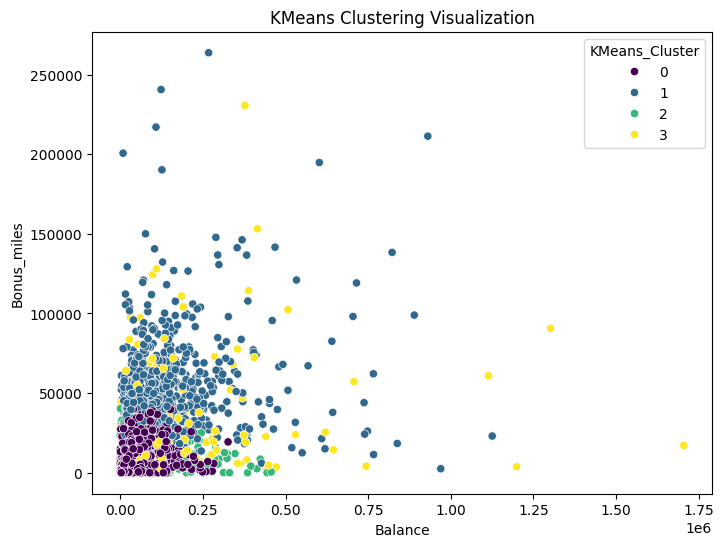

In [34]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df['Balance'], y=df['Bonus_miles'], hue=df['KMeans_Cluster'], palette='viridis')
plt.title("KMeans Clustering Visualization")
plt.show()

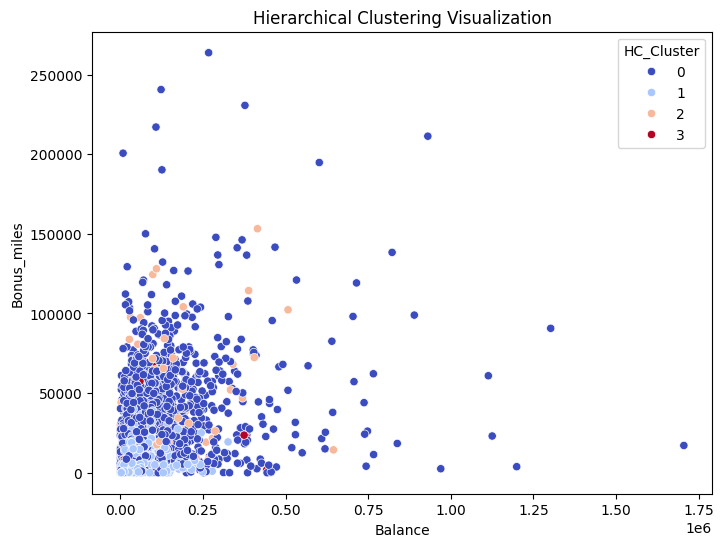

In [35]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df['Balance'], y=df['Bonus_miles'], hue=df['HC_Cluster'], palette='coolwarm')
plt.title("Hierarchical Clustering Visualization")
plt.show()

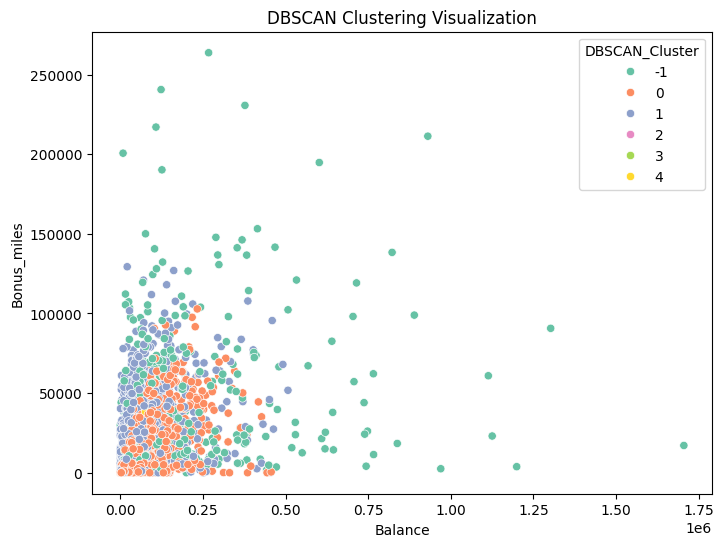

In [36]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df['Balance'], y=df['Bonus_miles'], hue=df['DBSCAN_Cluster'], palette='Set2')
plt.title("DBSCAN Clustering Visualization")
plt.show()

**5. Evaluation and Performance Metrics**

In [37]:
from sklearn.metrics import silhouette_score

In [38]:
kmeans_silhouette = silhouette_score(scaled_df, df['KMeans_Cluster'])
print(f"Silhouette Score for K-Means: {kmeans_silhouette}")

Silhouette Score for K-Means: 0.22808887010836637


In [39]:
if len(set(df['DBSCAN_Cluster'])) > 1:
    dbscan_silhouette = silhouette_score(scaled_df, df['DBSCAN_Cluster'])
    print(f"Silhouette Score for DBSCAN: {dbscan_silhouette}")

Silhouette Score for DBSCAN: 0.1895328629344176
